# Task 07 - Introduction to Discriminative Models - The Perceptron Algorithm
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from perceptron import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## Task 1 - separable
#### choose data from following:

In [2]:
data = np.load("data_perceptron_separable.npz", allow_pickle=True)
X = data["X"]
y = data["y"]

# # Testing/Debugging data
# X = np.array([[1, 1], [3, 3], [4, 4], [2, 2], [5, 5]], dtype=np.float32).T
# y = np.array([0, 0, 0, 1, 1])

# # Testing/Debugging data
# X = np.array([[1, 0], [0, 1], [2, 1]], dtype=np.float32).T
# y = np.array([0, 0, 1])

#### Run the perceptron algorithm with at most 100 iterations

In [3]:
w, b = perceptron(X, y, 100)

if np.all(np.isnan(w)):
    print('The algorithm did not converge in given iteration limit.')

#### Visualise

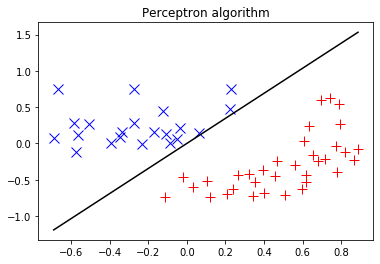

In [4]:
# Show the data and the resulting linear classifier
plt.figure()
plt.plot(X[0,y==0],X[1,y==0],'bx',ms=10)
plt.plot(X[0,y==1],X[1,y==1],'r+',ms=10)
x_bound =[np.min(X[0]), np.max(X[0])]
xs = np.linspace(x_bound[0], x_bound[1])
ys = -(xs*w[0] +b)/w[1]
plt.plot(xs,ys,'k-')
plt.title('Perceptron algorithm')
plt.savefig('perceptron_linear.png')

## Task 2 - unseparable

In [5]:
data = np.load("data_perceptron_unseparable.npz", allow_pickle=True)
X_un = data["X"]
y_un = data["y"]

In [6]:
Z_un = lift_dimension(X_un)

# Run the perceptron algorithm with at most 100 iterations
w_un, b_un = perceptron(Z_un, y_un, 100)

if np.all(np.isnan(w_un)):
    print('The algorithm did not converge in given iteration limit.')

#### Visualise

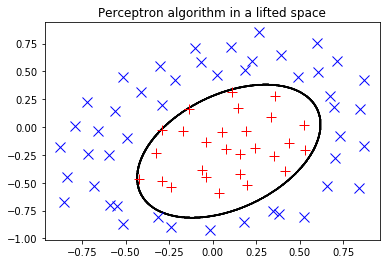

In [7]:
# Show the data and the resulting classifier
model = {'w': w_un, 'b': b_un}
pboundary(X_un, y_un, model)

plt.title('Perceptron algorithm in a lifted space')
plt.savefig('perceptron_quadratic.png')